# image classification model list

Detectron2: Detectron2 comes with pre-trained models for various object detection and instance segmentation tasks, including popular architectures like Faster R-CNN, RetinaNet, and Mask R-CNN.

AlexNet: One of the pioneering deep convolutional neural networks (CNNs) that won the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) in 2012.

VGG (Visual Geometry Group): A series of CNN models with varying depths, known for their simplicity and homogeneous architecture.

GoogLeNet/Inception: An influential model that introduced the concept of "inception modules" to improve computational efficiency and accuracy.

ResNet (Residual Network): A groundbreaking model that introduced residual connections, making it possible to train very deep neural networks effectively.

DenseNet: A CNN architecture that connects each layer to every other layer in a feedforward fashion, promoting feature reuse.

MobileNet: Designed for mobile and embedded vision applications, it utilizes depthwise separable convolutions to reduce the number of parameters.

EfficientNet: A scalable model that achieved state-of-the-art performance by scaling depth, width, and resolution in a balanced manner.

ResNeXt: An extension of ResNet that splits the transformation into multiple branches, leading to improved performance.

SqueezeNet: An architecture that significantly reduces the number of parameters without compromising accuracy.

NASNet (Neural Architecture Search Network): A model developed using automated neural architecture search methods to optimize the architecture.

Xception: An extension of the Inception model that uses depthwise separable convolutions.

ShuffleNet: A model designed to improve efficiency by employing channel shuffling and pointwise group convolution.

SENet (Squeeze-and-Excitation Network): An architecture that adaptively recalibrates channel-wise feature responses.

DenseNet: A densely connected CNN architecture that facilitates feature reuse and encourages feature propagation.

HRNet (High-Resolution Network): Focuses on preserving high-resolution representations throughout the network.

https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg19/VGG19

class names with labels:  {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
number of classes:  6
buildings : 2191
forest : 2271
glacier : 2404
mountain : 2512
sea : 2274
street : 2382
loading C:/Users/Nitin/Downloads/other/image/Intel Image Classification/seg_train


100%|████████████████████████████████████████████████████████████████████████████| 2382/2382 [00:01<00:00, 1205.05it/s]


Images file have been loaded
loading C:/Users/Nitin/Downloads/other/image/Intel Image Classification/seg_test


100%|███████████████████████████████████████████████████████████████████████████████| 501/501 [00:00<00:00, 938.20it/s]


Images file have been loaded
train dataset size:
 Images: 14034 , Labels 14034
test dataset size:
 Images: 3000 , Labels 3000


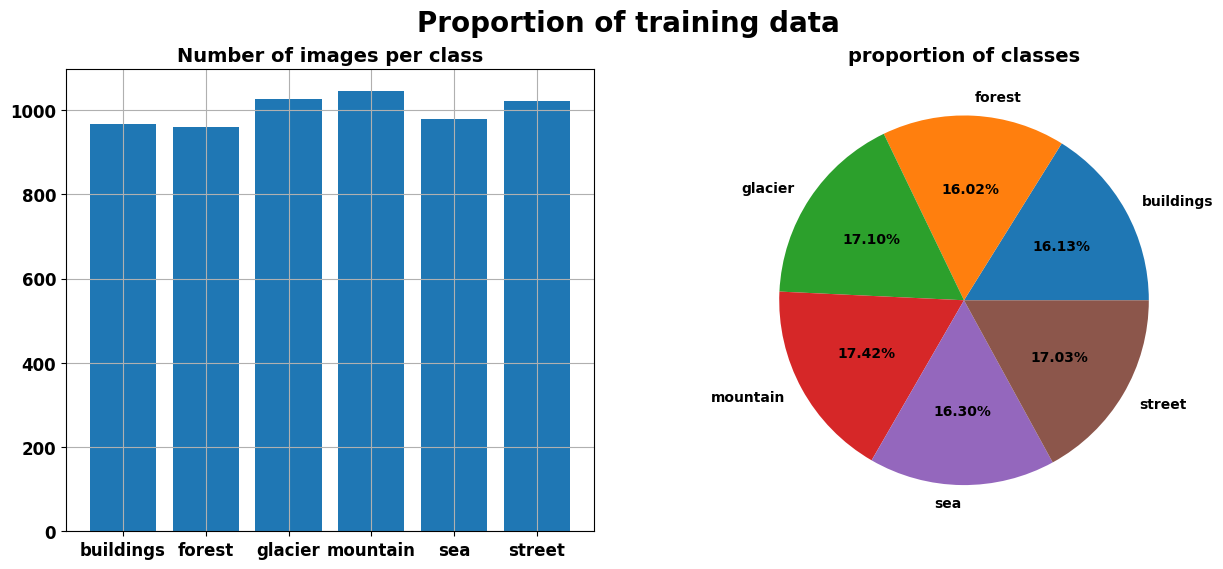

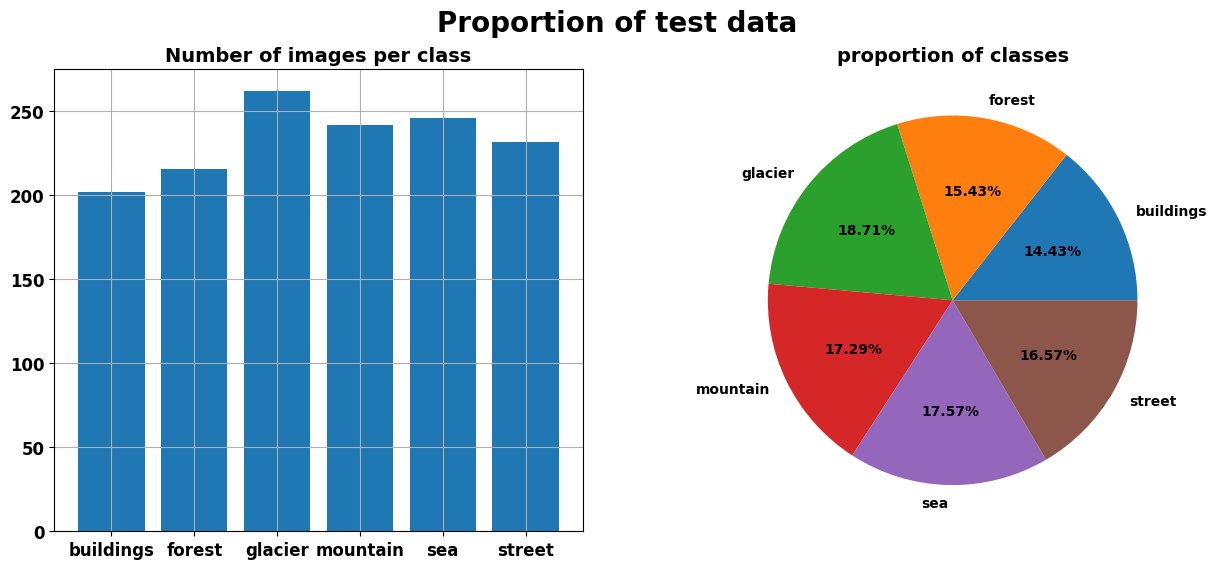

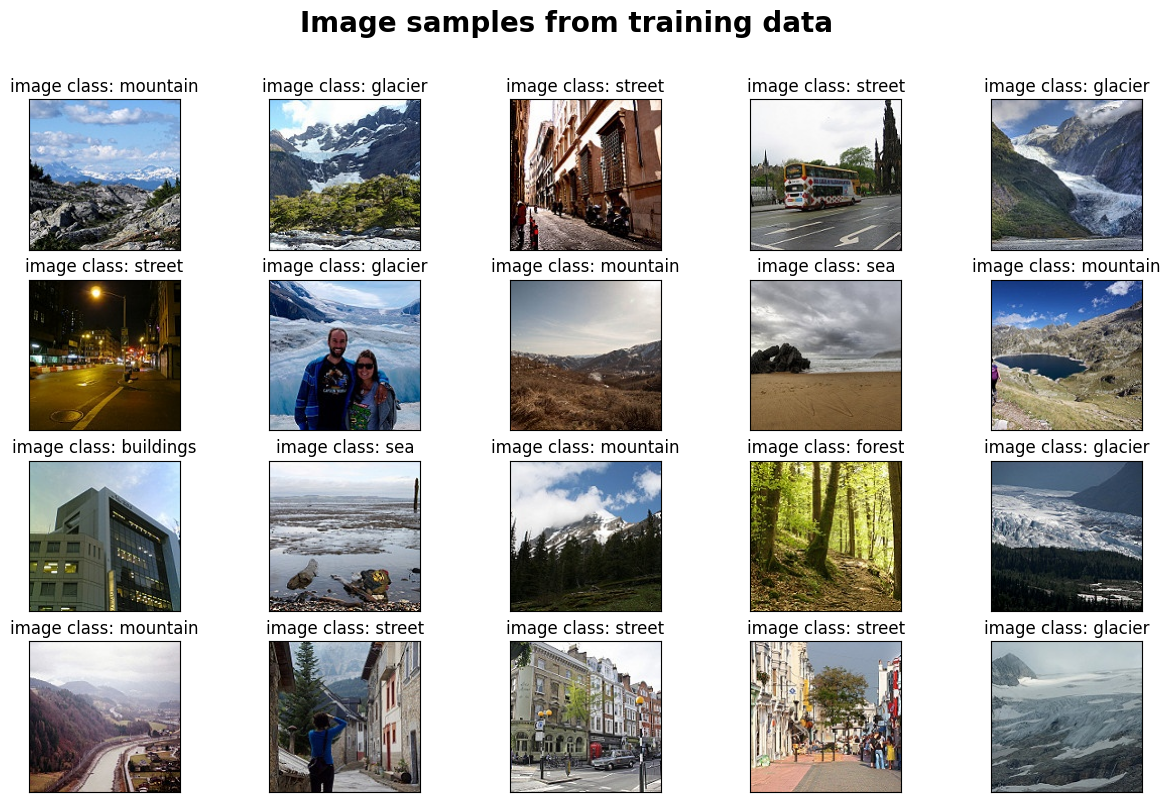

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

INFO:tensorflow:Assets written to: bestvalue\assets


INFO:tensorflow:Assets written to: bestvalue\assets


47/47 [==============================] - 64s 1s/step - loss: 1.4508 - accuracy: 0.4027 - val_loss: 1.2621 - val_accuracy: 0.4836
Epoch 2/5
47/47 [==============================] - ETA: 0s - loss: 1.1721 - accuracy: 0.5258

INFO:tensorflow:Assets written to: bestvalue\assets


INFO:tensorflow:Assets written to: bestvalue\assets


47/47 [==============================] - 60s 1s/step - loss: 1.1721 - accuracy: 0.5258 - val_loss: 1.0822 - val_accuracy: 0.5707
Epoch 3/5
47/47 [==============================] - ETA: 0s - loss: 1.0282 - accuracy: 0.5897

INFO:tensorflow:Assets written to: bestvalue\assets


INFO:tensorflow:Assets written to: bestvalue\assets


47/47 [==============================] - 61s 1s/step - loss: 1.0282 - accuracy: 0.5897 - val_loss: 1.0278 - val_accuracy: 0.6086
Epoch 4/5
47/47 [==============================] - ETA: 0s - loss: 0.9451 - accuracy: 0.6347

INFO:tensorflow:Assets written to: bestvalue\assets


INFO:tensorflow:Assets written to: bestvalue\assets


47/47 [==============================] - 59s 1s/step - loss: 0.9451 - accuracy: 0.6347 - val_loss: 0.9633 - val_accuracy: 0.6500
Epoch 5/5
47/47 [==============================] - 61s 1s/step - loss: 0.8867 - accuracy: 0.6557 - val_loss: 1.0522 - val_accuracy: 0.5929
test loss and accuracy: 1.0522444248199463 0.5928571224212646


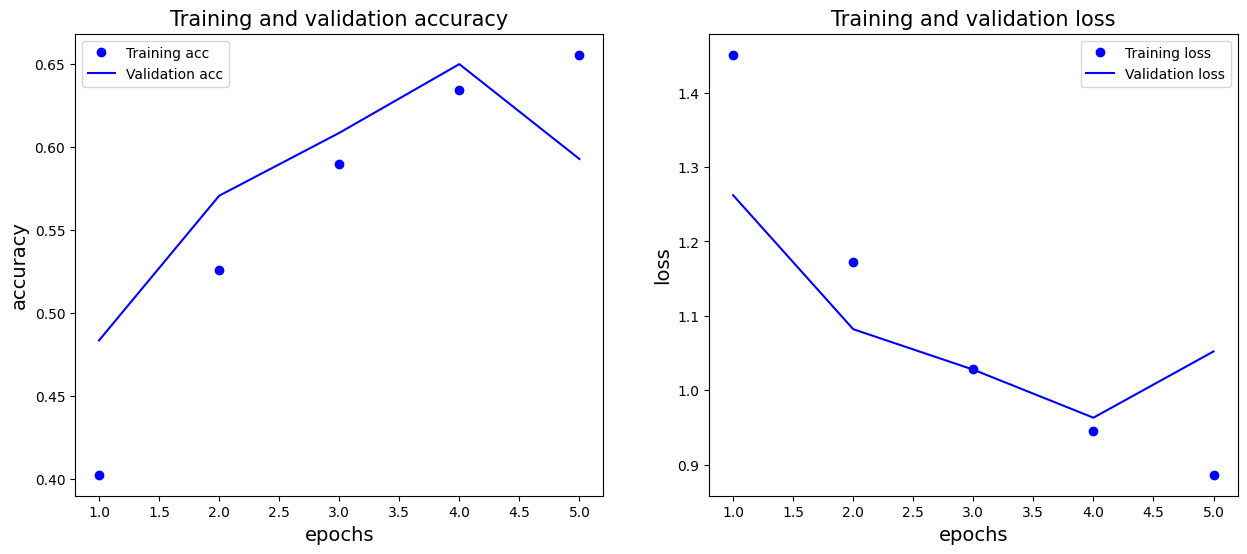

In [2]:
# importing libraries
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor,ToPILImage
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import cv2
from tqdm import tqdm
from sklearn.utils import shuffle
from skimage.io import imread, imshow
from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.models import load_model
from tensorflow.keras.utils import to_categorical
import keras.callbacks
from keras.callbacks import ModelCheckpoint
import random
from keras.applications import vgg16
from keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

train_dir = 'C:/Users/Nitin/Downloads/other/image/Intel Image Classification/seg_train'
test_dir = 'C:/Users/Nitin/Downloads/other/image/Intel Image Classification/seg_test'
pred_dir = 'C:/Users/Nitin/Downloads/other/image/Intel Image Classification/seg_pred'

# assign class labels
class_names = ['buildings','forest','glacier','mountain','sea','street']
class_labels = {class_name:i for i, class_name in enumerate(class_names)}
print("class names with labels: ",class_labels)

number_classes = len(class_names)
print("number of classes: ", number_classes)

IMAGE_SIZE = (150,150)

# usecase of os.listdir and os.path.join functions
for folder in os.listdir(train_dir):
    files_path = []
    for file in os.listdir(os.path.join(train_dir,folder)):
        files_path.append(file)
    print(folder,":", len(files_path))

# define load_dataset function to load dataset with labels
def load_dataset():
    # create list of datasets
    datasets = [train_dir, test_dir]
    output = []
    
    for dataset in datasets:
        
        images1 = []
        labels1 = []
        print(f"loading {dataset}")
        
        for folder in os.listdir(dataset):
            # assign labels to each folder images
            label = class_labels[folder]
            for file in tqdm(os.listdir(os.path.join(dataset,folder))):
                image_path = os.path.join(os.path.join(dataset, folder), file)
                # read the image files stored in image_path
                image_file = cv2.imread(image_path)
                image_file = cv2.cvtColor(image_file, cv2.COLOR_BGR2RGB)
                image_file = cv2.resize(image_file, IMAGE_SIZE)
                
                images1.append(image_file)
                labels1.append(label)
                
        # convert the images and labels list to numpy array
        images1 = np.array(images1, dtype = 'float32')
        labels1 = np.array(labels1, dtype = 'int32')
        
        output.append((images1, labels1))
        print("Images file have been loaded")
                
    return output 

# load the data using above functions
((train_images, train_labels), (test_images, test_labels)) = load_dataset()

print("train dataset size:\n", "Images:",len(train_images), ", Labels", len(train_labels))
print("test dataset size:\n", "Images:",len(test_images), ", Labels", len(test_labels))

# shape of image dataset is 4D tensors
train_images.shape, test_images.shape

# shuffle the train nad test datasets
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
test_images, test_labels = shuffle(test_images, test_labels, random_state=25)

# keeping 6000 data instances for training and testing our model
train_images = train_images[:6000]
train_labels = train_labels[:6000]

test_images = test_images[:1400]
test_labels = test_labels[:1400]

# let's see proportion of classes in train and test dataset
def proportion_labels(labels, dataset):
    series = pd.DataFrame(labels).reset_index()
    series.rename(columns = {0:'labels'}, inplace=True)
    final_s = series.groupby('labels').count().reset_index()                                          
    ticks1= [key for key in class_labels.keys()]
    
    # plot the pie chart and bar graph of labels
    plt.figure(figsize=(15,6))
    
    plt.subplot(121)
    plt.bar(np.array(final_s['labels']), np.array(final_s['index']))
    plt.xticks(ticks=np.array(final_s['labels']), labels=ticks1, fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')
    plt.grid(visible=True)
    plt.title("Number of images per class", size=14, weight='bold')
    
    plt.subplot(122)
    plt.pie(final_s['index'].ravel(),
            labels=ticks1,
            autopct='%1.2f%%',
            textprops={'fontweight':'bold'}
           )
    plt.title("proportion of classes", size=14, weight='bold')
    
    plt.suptitle(f"Proportion of {dataset} data", size=20, weight='bold')
    plt.show()
    
    return final_s

final_s = proportion_labels(train_labels, "training")

test_d = proportion_labels(test_labels, "test")

# normalize the images dataset
trn_images_norm = train_images/255.0
tst_images_norm = test_images/255.0

## plot 3*5 visualization of images
plt.figure(figsize=(15,9))
for idx, label in enumerate(train_labels[:20]):
    plt.subplot(4,5, idx+1)
    plt.imshow(trn_images_norm[idx])
    plt.xticks([])
    plt.yticks([])
    plt.title(f'image class: {class_names[label]}')   
    
plt.suptitle(f'Image samples from training data', size=20, weight='bold')
plt.show()

# model architecture of first keras model
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))
model.summary()

# convert labels to categorical 
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# compile the model with 'adam' optimizer
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy']
             )

# SETUP A EARLY STOPPING CALL and model check point API
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=5,
                                              verbose=1,
                                              mode='min'
                                              )
checkpointer = ModelCheckpoint(filepath='bestvalue', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]

# fit model to the data
history = model.fit(trn_images_norm, train_labels, batch_size=128, epochs=5, validation_data=(tst_images_norm, test_labels),
                   callbacks=callback_list)

# evalute the model
test_loss, test_acc = model.evaluate(tst_images_norm, test_labels, verbose=0)
print("test loss and accuracy:", test_loss, test_acc)

def plot_loss_accuracy(history):

    # create object of arrays of accuracy and loss
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # number of epochs in our model
    epochs = range(1 ,len(acc) + 1)
    
    # call matplolib figure object and plot loss and accuracy curves
    plt.figure(figsize=(15,6))
    
    plt.subplot(121)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title("Training and validation accuracy", fontsize=15)
    plt.xlabel('epochs', fontsize=14)
    plt.ylabel("accuracy", fontsize=14)
    plt.legend()
    
    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title("Training and validation loss", fontsize=15)
    plt.xlabel('epochs', fontsize=14)
    plt.ylabel("loss", fontsize=14)
    plt.legend()
    
    plt.show()

# call the function to plot the curves
plot_loss_accuracy(history)


# InceptionV3

class names with labels:  {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
number of classes:  6
Epoch 1/3
188/188 [==============================] - ETA: 0s - loss: 0.7158 - accuracy: 0.7723

INFO:tensorflow:Assets written to: bestvalue\assets


INFO:tensorflow:Assets written to: bestvalue\assets


188/188 [==============================] - 408s 2s/step - loss: 0.7158 - accuracy: 0.7723 - val_loss: 6.0547 - val_accuracy: 0.3300
Epoch 2/3
188/188 [==============================] - ETA: 0s - loss: 0.4260 - accuracy: 0.8560

INFO:tensorflow:Assets written to: bestvalue\assets


INFO:tensorflow:Assets written to: bestvalue\assets


188/188 [==============================] - 419s 2s/step - loss: 0.4260 - accuracy: 0.8560 - val_loss: 1.0127 - val_accuracy: 0.8079
Epoch 3/3
44/44 [==============================] - 15s 339ms/step - loss: 2.8800 - accuracy: 0.5164
Test Loss: 2.8799662590026855, Test Accuracy: 0.5164285898208618
44/44 [==============================] - 16s 335ms/step
Classification Report:
               precision    recall  f1-score   support

   buildings       0.27      0.99      0.43       202
      forest       0.90      0.04      0.08       216
     glacier       0.72      0.77      0.74       262
    mountain       0.83      0.57      0.67       242
         sea       0.83      0.61      0.71       246
      street       0.96      0.10      0.19       232

    accuracy                           0.52      1400
   macro avg       0.75      0.51      0.47      1400
weighted avg       0.76      0.52      0.48      1400



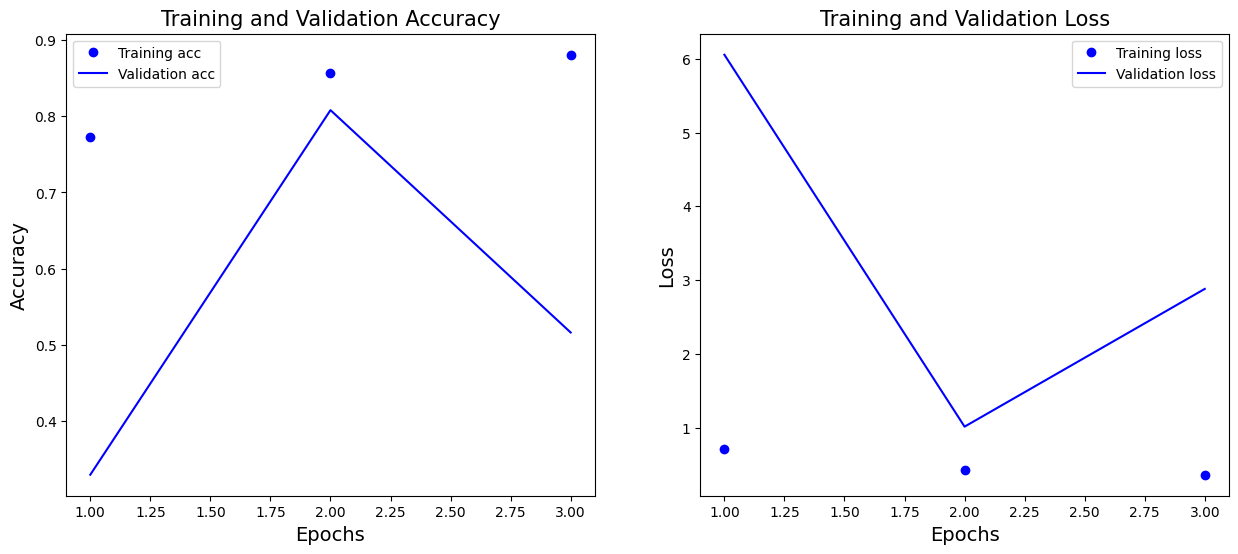

In [3]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
import keras.callbacks
from keras.callbacks import ModelCheckpoint

# Step 1: Check GPU availability and set memory growth
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Step 2: Define directories and parameters
train_dir = 'C:/Users/Nitin/Downloads/other/image/Intel Image Classification/seg_train'
test_dir = 'C:/Users/Nitin/Downloads/other/image/Intel Image Classification/seg_test'

# assign class labels
class_names = ['buildings','forest','glacier','mountain','sea','street']
class_labels = {class_name:i for i, class_name in enumerate(class_names)}
print("class names with labels: ",class_labels)

number_classes = len(class_names)
print("number of classes: ", number_classes)

IMAGE_SIZE = (150,150)

target_size = (150, 150)
batch_size = 32
num_classes = 6  # Number of classes in your dataset
epochs = 3 #15

# Step 3: Load the dataset
def load_dataset(dataset_dir):
    images = []
    labels = []
    for folder in os.listdir(dataset_dir):
        label = class_labels[folder]
        for file in os.listdir(os.path.join(dataset_dir, folder)):
            image_path = os.path.join(os.path.join(dataset_dir, folder), file)
            image_file = cv2.imread(image_path)
            image_file = cv2.cvtColor(image_file, cv2.COLOR_BGR2RGB)
            image_file = cv2.resize(image_file, target_size)
            images.append(image_file)
            labels.append(label)

    images = np.array(images, dtype='float32')
    labels = np.array(labels, dtype='int32')

    return images, labels

train_images, train_labels = load_dataset(train_dir)
test_images, test_labels = load_dataset(test_dir)

class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_labels = {class_name: i for i, class_name in enumerate(class_names)}

# Step 4: Preprocess and shuffle the dataset
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
test_images, test_labels = shuffle(test_images, test_labels, random_state=25)

# Good practice: scale the data
train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_images = train_images[:6000]
train_labels = train_labels[:6000]

test_images = test_images[:1400]
test_labels = test_labels[:1400]

# Step 5: Load the pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(target_size[0], target_size[1], 3))

# Step 6: Add custom classification layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Step 7: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 8: Define callbacks
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
checkpointer = ModelCheckpoint(filepath='bestvalue', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]

# Step 9: Train the model with GPU support
with tf.device('/GPU:0'):
    history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_images, test_labels),
                        callbacks=callback_list)

# Step 10: Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Step 11: Generate classification report
from sklearn.metrics import classification_report
test_pred = model.predict(test_images)
y_pred_classes = np.argmax(test_pred, axis=1)
report = classification_report(np.argmax(test_labels, axis=1), y_pred_classes, target_names=class_names)
print("Classification Report:\n", report)

# Step 12: Plot Loss and Accuracy Curves
def plot_loss_accuracy(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(15, 6))

    plt.subplot(121)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title("Training and Validation Accuracy", fontsize=15)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)
    plt.legend()

    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title("Training and Validation Loss", fontsize=15)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel("Loss", fontsize=14)
    plt.legend()

    plt.show()

plot_loss_accuracy(history)


# VGG16 and VGG19 model (Visual Geometry Group)

In [8]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
import keras.callbacks
from keras.callbacks import ModelCheckpoint

# Step 1: Check GPU availability and set memory growth
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Step 2: Define directories and parameters
train_dir = 'C:/Users/Nitin/Downloads/other/image/Intel Image Classification/seg_train'
test_dir = 'C:/Users/Nitin/Downloads/other/image/Intel Image Classification/seg_test'

# assign class labels
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_labels = {class_name: i for i, class_name in enumerate(class_names)}
print("class names with labels: ", class_labels)

number_classes = len(class_names)
print("number of classes: ", number_classes)

IMAGE_SIZE = (150, 150)

target_size = (150, 150)
batch_size = 32
num_classes = 6  # Number of classes in your dataset
epochs = 3 #15

# Step 3: Load the dataset
def load_dataset(dataset_dir):
    images = []
    labels = []
    for folder in os.listdir(dataset_dir):
        label = class_labels[folder]
        for file in os.listdir(os.path.join(dataset_dir, folder)):
            image_path = os.path.join(os.path.join(dataset_dir, folder), file)
            image_file = cv2.imread(image_path)
            image_file = cv2.cvtColor(image_file, cv2.COLOR_BGR2RGB)
            image_file = cv2.resize(image_file, target_size)
            images.append(image_file)
            labels.append(label)

    images = np.array(images, dtype='float32')
    labels = np.array(labels, dtype='int32')

    return images, labels

train_images, train_labels = load_dataset(train_dir)
test_images, test_labels = load_dataset(test_dir)

class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_labels = {class_name: i for i, class_name in enumerate(class_names)}

# Step 4: Preprocess and shuffle the dataset
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
test_images, test_labels = shuffle(test_images, test_labels, random_state=25)

# Good practice: scale the data
train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_images = train_images[:6000]
train_labels = train_labels[:6000]

test_images = test_images[:1400]
test_labels = test_labels[:1400]

# Step 5: Load the pre-trained VGG16 or VGG19 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(target_size[0], target_size[1], 3))
# base_model = VGG19(weights='imagenet', include_top=False, input_shape=(target_size[0], target_size[1], 3))

# Step 6: Add custom classification layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Step 7: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 8: Define callbacks
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
checkpointer = ModelCheckpoint(filepath='bestvalue', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]

# Step 9: Train the model with GPU support
with tf.device('/GPU:0'):
    history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_images, test_labels),
                        callbacks=callback_list)

# Step 10: Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Step 11: Generate classification report
from sklearn.metrics import classification_report
test_pred = model.predict(test_images)
y_pred_classes = np.argmax(test_pred, axis=1)
report = classification_report(np.argmax(test_labels, axis=1), y_pred_classes, target_names=class_names)
print("Classification Report:\n", report)

# Step 12: Plot Loss and Accuracy Curves
def plot_loss_accuracy(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(15, 6))

    plt.subplot(121)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title("Training and Validation Accuracy", fontsize=15)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)
    plt.legend()

    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title("Training and Validation Loss", fontsize=15)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel("Loss", fontsize=14)
    plt.legend()

    plt.show()

plot_loss_accuracy(history)


class names with labels:  {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
number of classes:  6
Epoch 1/3
 43/188 [=====>........................] - ETA: 27:51 - loss: 1.9583 - accuracy: 0.1766

KeyboardInterrupt: 

# Limitations Of VGG 16 and 19:

It is very slow to train (the original VGG model was trained on Nvidia Titan GPU for 2–3 weeks).

The size of VGG-16 trained imageNet weights is 528 MB. So, it takes quite a lot of disk space and bandwidth which makes it inefficient.

138 million parameters lead to exploding gradients problem.

# ResNet (Residual Network)

class names with labels:  {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
number of classes:  6
Epoch 1/3
188/188 [==============================] - ETA: 0s - loss: 0.7839 - accuracy: 0.7590

INFO:tensorflow:Assets written to: bestvalue\assets


INFO:tensorflow:Assets written to: bestvalue\assets


188/188 [==============================] - 1096s 6s/step - loss: 0.7839 - accuracy: 0.7590 - val_loss: 10.3645 - val_accuracy: 0.1757
Epoch 2/3
188/188 [==============================] - ETA: 0s - loss: 0.4179 - accuracy: 0.8582

INFO:tensorflow:Assets written to: bestvalue\assets


INFO:tensorflow:Assets written to: bestvalue\assets


188/188 [==============================] - 1185s 6s/step - loss: 0.4179 - accuracy: 0.8582 - val_loss: 2.8219 - val_accuracy: 0.1757
Epoch 3/3
188/188 [==============================] - ETA: 0s - loss: 0.3393 - accuracy: 0.8858

INFO:tensorflow:Assets written to: bestvalue\assets


INFO:tensorflow:Assets written to: bestvalue\assets


44/44 [==============================] - 66s 1s/step - loss: 1.5367 - accuracy: 0.4429
Test Loss: 1.536672830581665, Test Accuracy: 0.44285714626312256
44/44 [==============================] - 65s 1s/step
Classification Report:
               precision    recall  f1-score   support

   buildings       0.92      0.11      0.19       202
      forest       0.58      0.93      0.71       216
     glacier       0.54      0.16      0.24       262
    mountain       0.54      0.45      0.49       242
         sea       0.32      0.93      0.47       246
      street       0.79      0.08      0.15       232

    accuracy                           0.44      1400
   macro avg       0.61      0.44      0.38      1400
weighted avg       0.60      0.44      0.38      1400



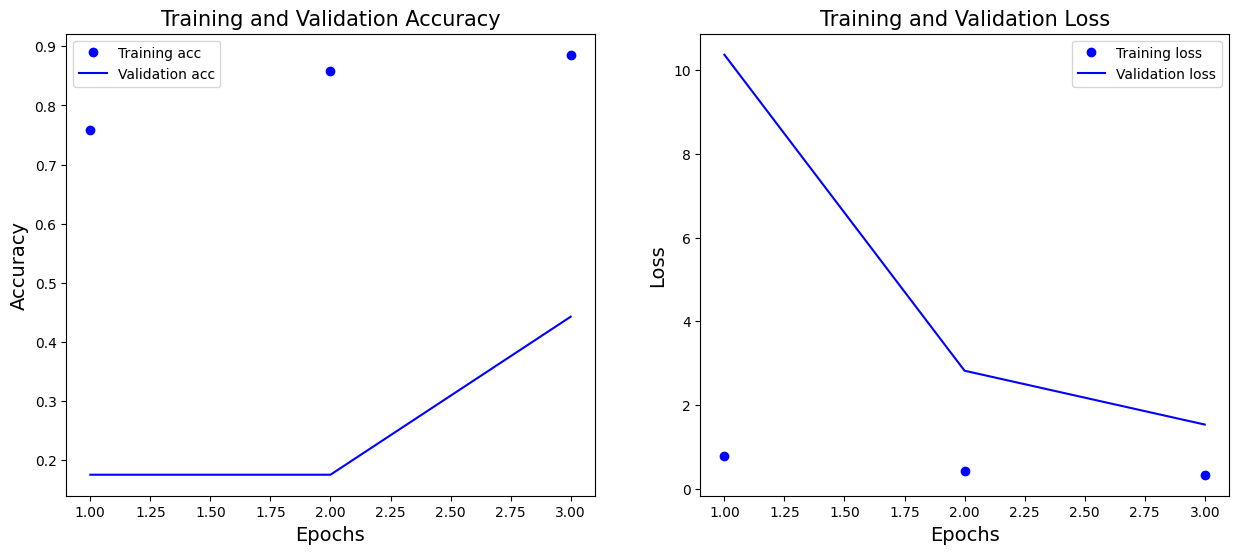

In [9]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
import keras.callbacks
from keras.callbacks import ModelCheckpoint

# Step 1: Check GPU availability and set memory growth
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Step 2: Define directories and parameters
train_dir = 'C:/Users/Nitin/Downloads/other/image/Intel Image Classification/seg_train'
test_dir = 'C:/Users/Nitin/Downloads/other/image/Intel Image Classification/seg_test'

# assign class labels
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_labels = {class_name: i for i, class_name in enumerate(class_names)}
print("class names with labels: ", class_labels)

number_classes = len(class_names)
print("number of classes: ", number_classes)

IMAGE_SIZE = (150, 150)

target_size = (150, 150)
batch_size = 32
num_classes = 6  # Number of classes in your dataset
epochs = 3 #15

# Step 3: Load the dataset
def load_dataset(dataset_dir):
    images = []
    labels = []
    for folder in os.listdir(dataset_dir):
        label = class_labels[folder]
        for file in os.listdir(os.path.join(dataset_dir, folder)):
            image_path = os.path.join(os.path.join(dataset_dir, folder), file)
            image_file = cv2.imread(image_path)
            image_file = cv2.cvtColor(image_file, cv2.COLOR_BGR2RGB)
            image_file = cv2.resize(image_file, target_size)
            images.append(image_file)
            labels.append(label)

    images = np.array(images, dtype='float32')
    labels = np.array(labels, dtype='int32')

    return images, labels

train_images, train_labels = load_dataset(train_dir)
test_images, test_labels = load_dataset(test_dir)

class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_labels = {class_name: i for i, class_name in enumerate(class_names)}

# Step 4: Preprocess and shuffle the dataset
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
test_images, test_labels = shuffle(test_images, test_labels, random_state=25)

# Good practice: scale the data
train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_images = train_images[:6000]
train_labels = train_labels[:6000]

test_images = test_images[:1400]
test_labels = test_labels[:1400]

# Step 5: Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(target_size[0], target_size[1], 3))

# Step 6: Add custom classification layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Step 7: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 8: Define callbacks
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
checkpointer = ModelCheckpoint(filepath='bestvalue', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]

# Step 9: Train the model with GPU support
with tf.device('/GPU:0'):
    history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_images, test_labels),
                        callbacks=callback_list)

# Step 10: Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Step 11: Generate classification report
from sklearn.metrics import classification_report
test_pred = model.predict(test_images)
y_pred_classes = np.argmax(test_pred, axis=1)
report = classification_report(np.argmax(test_labels, axis=1), y_pred_classes, target_names=class_names)
print("Classification Report:\n", report)

# Step 12: Plot Loss and Accuracy Curves
def plot_loss_accuracy(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(15, 6))

    plt.subplot(121)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title("Training and Validation Accuracy", fontsize=15)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)
    plt.legend()

    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title("Training and Validation Loss", fontsize=15)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel("Loss", fontsize=14)
    plt.legend()

    plt.show()

plot_loss_accuracy(history)
